<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

벡터 내적 정의

$\mathbf{A} \cdot \mathbf{B} = ||\mathbf{A}|| \ ||\mathbf{B}|| \ cos(\theta) $

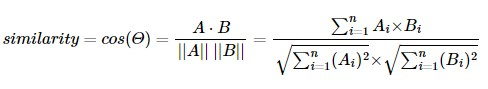

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
ls ./drive/MyDrive/data/topics/

accuracy_garmin_nuvi_255W_gps.txt.data    performance_netbook_1005ha.txt.data
bathroom_bestwestern_hotel_sfo.txt.data   price_amazon_kindle.txt.data
battery-life_amazon_kindle.txt.data       price_holiday_inn_london.txt.data
battery-life_ipod_nano_8gb.txt.data       quality_toyota_camry_2007.txt.data
battery-life_netbook_1005ha.txt.data      room_holiday_inn_london.txt.data
buttons_amazon_kindle.txt.data            rooms_bestwestern_hotel_sfo.txt.data
comfort_honda_accord_2008.txt.data        rooms_swissotel_chicago.txt.data
comfort_toyota_camry_2007.txt.data        satellite_garmin_nuvi_255W_gps.txt.data
directions_garmin_nuvi_255W_gps.txt.data  screen_garmin_nuvi_255W_gps.txt.data
display_garmin_nuvi_255W_gps.txt.data     screen_ipod_nano_8gb.txt.data
eyesight-issues_amazon_kindle.txt.data    screen_netbook_1005ha.txt.data
features_windows7.txt.data                seats_honda_accord_2008.txt.data
fonts_amazon_kindle.txt.data              service_bestwestern_hotel_sfo.txt.data
food_ho

In [ ]:
import glob, os

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('all')

호텔, 자동차, 전자제품에 대한 리뷰 파일들

In [ ]:
file_list = glob.glob('./drive/MyDrive/data/topics/*.data')

In [ ]:
len(file_list)

51

In [ ]:
file_ = './drive/MyDrive/data/topics/battery-life_ipod_nano_8gb.txt.data'

In [ ]:
df = pd.read_table(file_, index_col=None, encoding='latin1')

In [ ]:
df

,short battery life I moved up from an 8gb .
0,I love this ipod except for the battery life .
1,long battery scratch resistant
2,Battery drains even if I don't use it .
3,I only wonder why the battery seems to drain ...
4,"great in the car, light, portable, good quali..."
...,...
63,The video camera works great and the battery
64,Then you find the battery only lasts about 1 .
65,"Long Battery Life, Sleek Compact, Easy To Set..."
66,My only complaint with this product is that th...


In [ ]:
df.to_string()

"                                                                                                                                                                                                                                                                                               short battery life  I moved up from an 8gb .\n0                                                                                                                                                                                                                                                                                            I love this ipod except for the battery life .\n1                                                                                                                                                                                                                                                                                                           long battery  scratch resistant\n

In [ ]:
def make_document_df(file_list):
    filename_list = []
    doc_list = []
    idx = file_list[0].rfind('/')
    for i in file_list:
        x = i[idx+1:]
        x_idx = x.find('.')
        filename_list.append(x[:x_idx])

        y = pd.read_table(i, index_col=None, encoding='latin1').to_string()
        doc_list.append(y)

    document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':doc_list})
    return document_df

document_df = make_document_df(file_list)
document_df.head()

In [ ]:
file_list

In [ ]:
file_

'./drive/MyDrive/data/topics/battery-life_ipod_nano_8gb.txt.data'

In [ ]:
file_.split('/')[-1].split('.')[0]

'battery-life_ipod_nano_8gb'

In [ ]:
filename_list=[]
doc_list=[]

In [ ]:
for file_ in file_list:
    filename_list.append(file_.split('/')[-1].split('.')[0])
    doc_list.append(pd.read_table(file_, index_col=None, encoding='latin1').to_string())

In [ ]:
filename_list[:3]

['battery-life_ipod_nano_8gb',
 'features_windows7',
 'updates_garmin_nuvi_255W_gps']

In [ ]:
len(filename_list)

51

In [ ]:
doc_list[0]

"                                                                                                                                                                                                                                                                                               short battery life  I moved up from an 8gb .\n0                                                                                                                                                                                                                                                                                            I love this ipod except for the battery life .\n1                                                                                                                                                                                                                                                                                                           long battery  scratch resistant\n

In [ ]:
len(doc_list)

51

In [ ]:
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':doc_list})

In [ ]:
document_df.head()

,filename,opinion_text
0,battery-life_ipod_nano_8gb,...
1,features_windows7,...
2,updates_garmin_nuvi_255W_gps,...
3,keyboard_netbook_1005ha,...
4,speed_garmin_nuvi_255W_gps,...


In [ ]:
document_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   filename      51 non-null     object
 1   opinion_text  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


### 텍스트 정규화 함수 만들기


In [ ]:
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
import nltk

In [ ]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

In [ ]:
remove_punct_dict

In [ ]:
lemmar = WordNetLemmatizer()

In [ ]:
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

In [ ]:
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1, 2), max_df=0.85, min_df=0.05)

In [ ]:
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [ ]:
feature_vect

<51x4611 sparse matrix of type '<class 'numpy.float64'>'
	with 30124 stored elements in Compressed Sparse Row format>

In [ ]:
feature_vect.shape

(51, 4611)

In [ ]:
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
document_df['cluster_label'] = cluster_label

In [ ]:
document_df

In [ ]:
document_df[document_df['cluster_label']==1]

,filename,opinion_text,cluster_label
20,food_holiday_inn_london,...,1
24,service_holiday_inn_london,...,1
25,staff_swissotel_chicago,...,1
26,price_holiday_inn_london,...,1
27,service_swissotel_hotel_chicago,...,1
28,location_holiday_inn_london,...,1
30,rooms_swissotel_chicago,...,1
32,room_holiday_inn_london,...,1
33,food_swissotel_chicago,...,1
41,location_bestwestern_hotel_sfo,...,1


In [ ]:
hotel_idx = document_df[document_df['cluster_label']==1].index

In [ ]:
hotel_idx

Int64Index([20, 24, 25, 26, 27, 28, 30, 32, 33, 41, 42, 43, 44, 45, 49, 50], dtype='int64')

In [ ]:
hotel_doc1 = document_df.iloc[hotel_idx[0]]['filename']

In [ ]:
hotel_doc1

'food_holiday_inn_london'

In [ ]:
similarity = cosine_similarity(feature_vect[hotel_idx[0]], feature_vect[hotel_idx])

In [ ]:
similarity

array([[1.        , 0.34678827, 0.09611626, 0.21242179, 0.24657221,
        0.18388305, 0.12513566, 0.15836737, 0.84955849, 0.11008256,
        0.05267947, 0.28935552, 0.12209189, 0.06104731, 0.0430688 ,
        0.14089226]])

In [ ]:
similarity.argsort()

array([[14, 10, 13,  2,  9, 12,  6, 15,  7,  5,  3,  4, 11,  1,  8,  0]])

---
---

In [ ]:
x = np.array([31, 21, 11, 1])
x.argsort()

array([3, 2, 1, 0])

In [ ]:
x.argsort()[::-1]

array([0, 1, 2, 3])

---
---

In [ ]:
sort_idx = similarity.argsort()[:, ::-1]

In [ ]:
sort_idx

array([[ 0,  8,  1, 11,  4,  3,  5,  7, 15,  6, 12,  9,  2, 13, 10, 14]])

In [ ]:
hotel_idx

Int64Index([20, 24, 25, 26, 27, 28, 30, 32, 33, 41, 42, 43, 44, 45, 49, 50], dtype='int64')

In [ ]:
sort_idx = sort_idx[:, 1:]

In [ ]:
sort_idx

array([[ 8,  1, 11,  4,  3,  5,  7, 15,  6, 12,  9,  2, 13, 10, 14]])

In [ ]:
hotel_sorted_indexes = hotel_idx[sort_idx.reshape(-1)]

In [ ]:
hotel_sorted_indexes

Int64Index([33, 24, 43, 27, 26, 28, 32, 50, 30, 44, 41, 25, 45, 42, 49], dtype='int64')

In [ ]:
hotel_similarity = similarity[0, sort_idx.reshape(-1)]

In [ ]:
hotel_similarity

array([0.84955849, 0.34678827, 0.28935552, 0.24657221, 0.21242179,
       0.18388305, 0.15836737, 0.14089226, 0.12513566, 0.12209189,
       0.11008256, 0.09611626, 0.06104731, 0.05267947, 0.0430688 ])

In [ ]:
hs_df = pd.DataFrame()

In [ ]:
hs_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hs_df['similarity'] = hotel_similarity

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'food_holiday_inn_london')

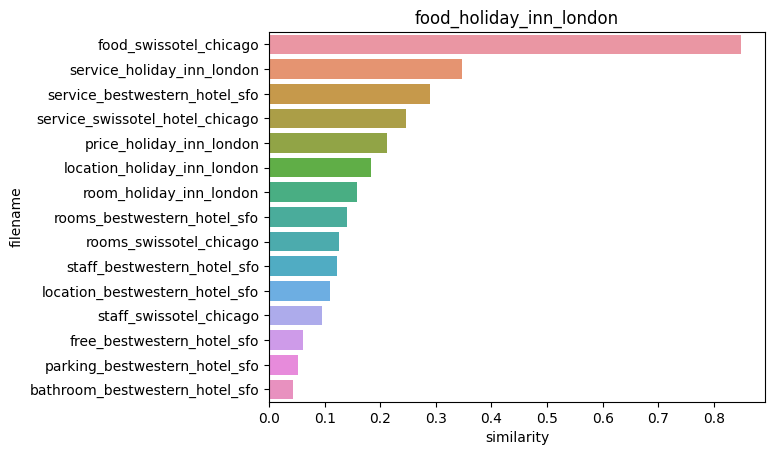

In [ ]:
sns.barplot(x='similarity', y='filename', data=hs_df)
plt.title(hotel_doc1)

#딥러닝

In [ ]:
def AND(x1, x2):
    y = 0.5 * x1 + 0.5 * x2 - 0.7
    if y <= 0:
        return 0
    else:
        return 1

In [ ]:
AND(0, 0)

0

In [ ]:
AND(0, 1)

0

In [ ]:
AND(1, 0)

0

In [ ]:
AND(1,1)

1

In [ ]:
def AND(x1, x2):
    X = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    y = np.dot(X, w)+b
    if y<=0:
        return 0
    else:
        return 1

In [ ]:
def OR(x1, x2):
    X = np.array([x1, x2])
    w = np.array([1, 1])
    b = -0.5
    y = np.dot(X, w)+b
    if y<=0:
        return 0
    else:
        return 1

In [ ]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


$$
b_1 + w_1 x_1  + w_2 x_2
\\
\quad \\
-0.5 + x_1 + x_2 <= 0, \quad => \quad 0
\\
\quad \\
-0.5 + x_1 + x_2 > 0, \quad => \quad 1
\\
\quad \\
x_2 <= -x_1 + 0.5, \quad => \quad 0
\\
\quad \\
x_2 > -x_1 + 0.5, \quad => \quad 1
$$

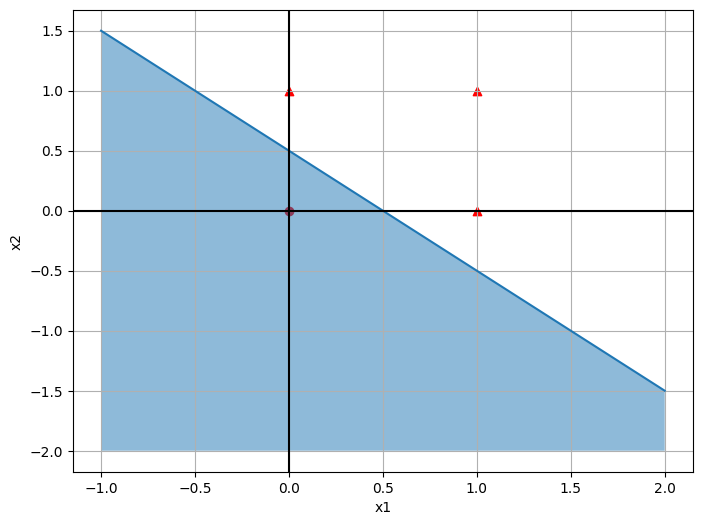

In [ ]:
x1 = np.linspace(-1,2,20)
x2 = -x1+0.5
plt.figure(figsize=(8,6))
plt.plot(x1, x2)

plt.axvline(x=0,color='k')
plt.axhline(y=0,color='k')
plt.scatter([0],[0],marker='o',color='r')
plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.xlabel("x1") # x축 이름
plt.ylabel("x2") # y축 이름
plt.fill_between(x1,x2,-2, alpha=0.5) # y값에서 y축의 -2 까지의 값들에 대해 색깔칠해준다.
plt.grid()

In [ ]:
def NAND(x1, x2):
    X = np.array([x1, x2])
    w = np.array([-1, -1])
    b = 1.2
    y = np.dot(X, w)+b
    if y<=0:
        return 0
    else:
        return 1

In [ ]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


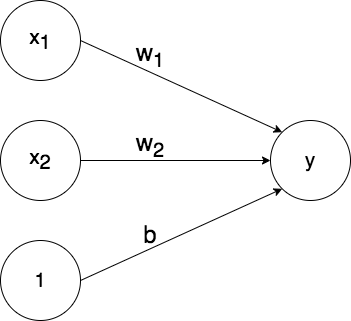

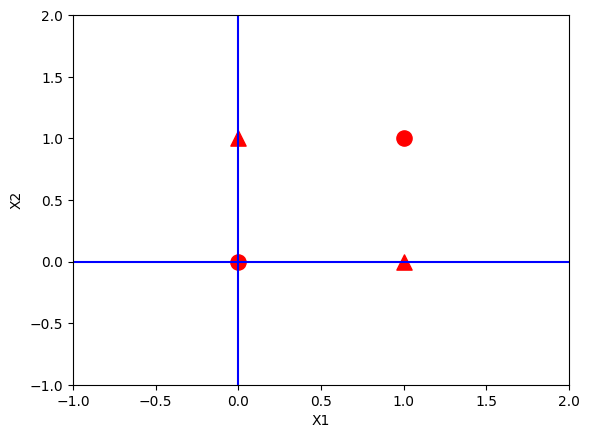

In [ ]:
plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름

plt.scatter([0,1],[0,1],marker='o',color='r', s=120)
plt.scatter([1,0],[0,1],marker='^',color='r', s=120)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [ ]:
print(XOR(0, 0)) # 0을 출력
print(XOR(1, 0)) # 1을 출력
print(XOR(0, 1)) # 1을 출력
print(XOR(1, 1)) # 0을 출력

0
1
1
0


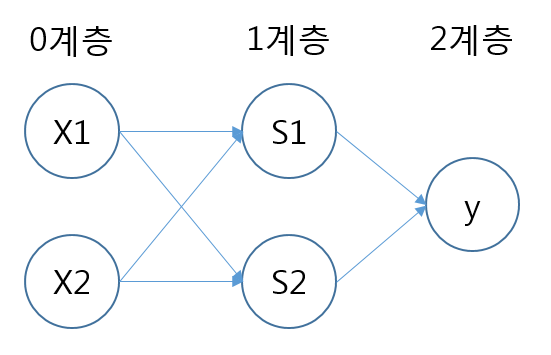

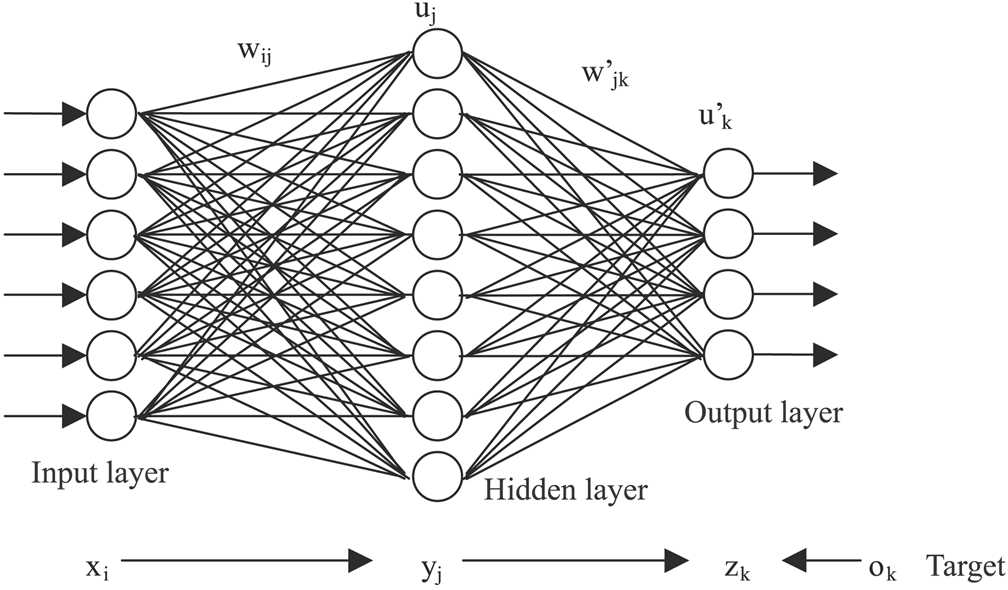

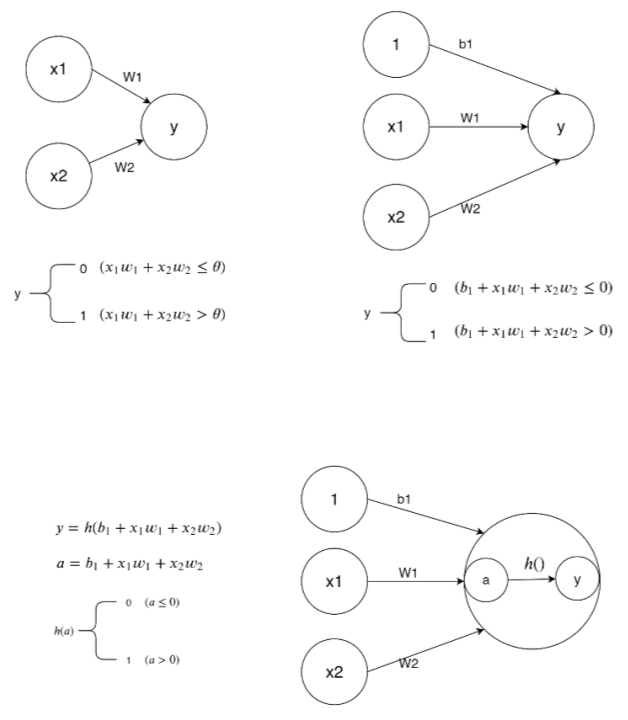

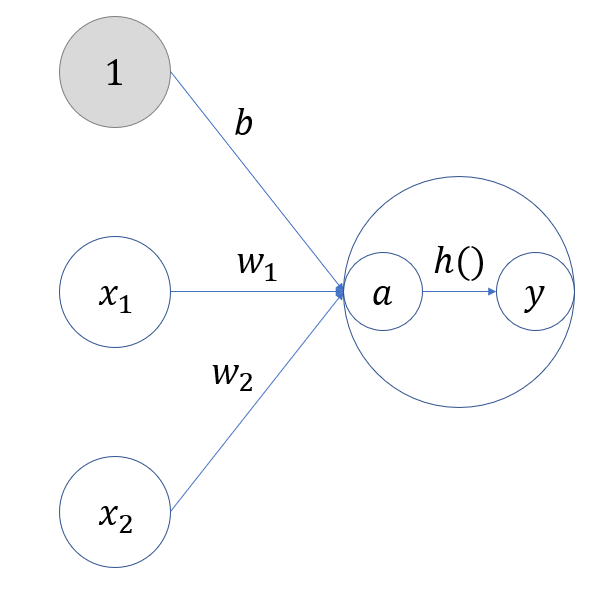

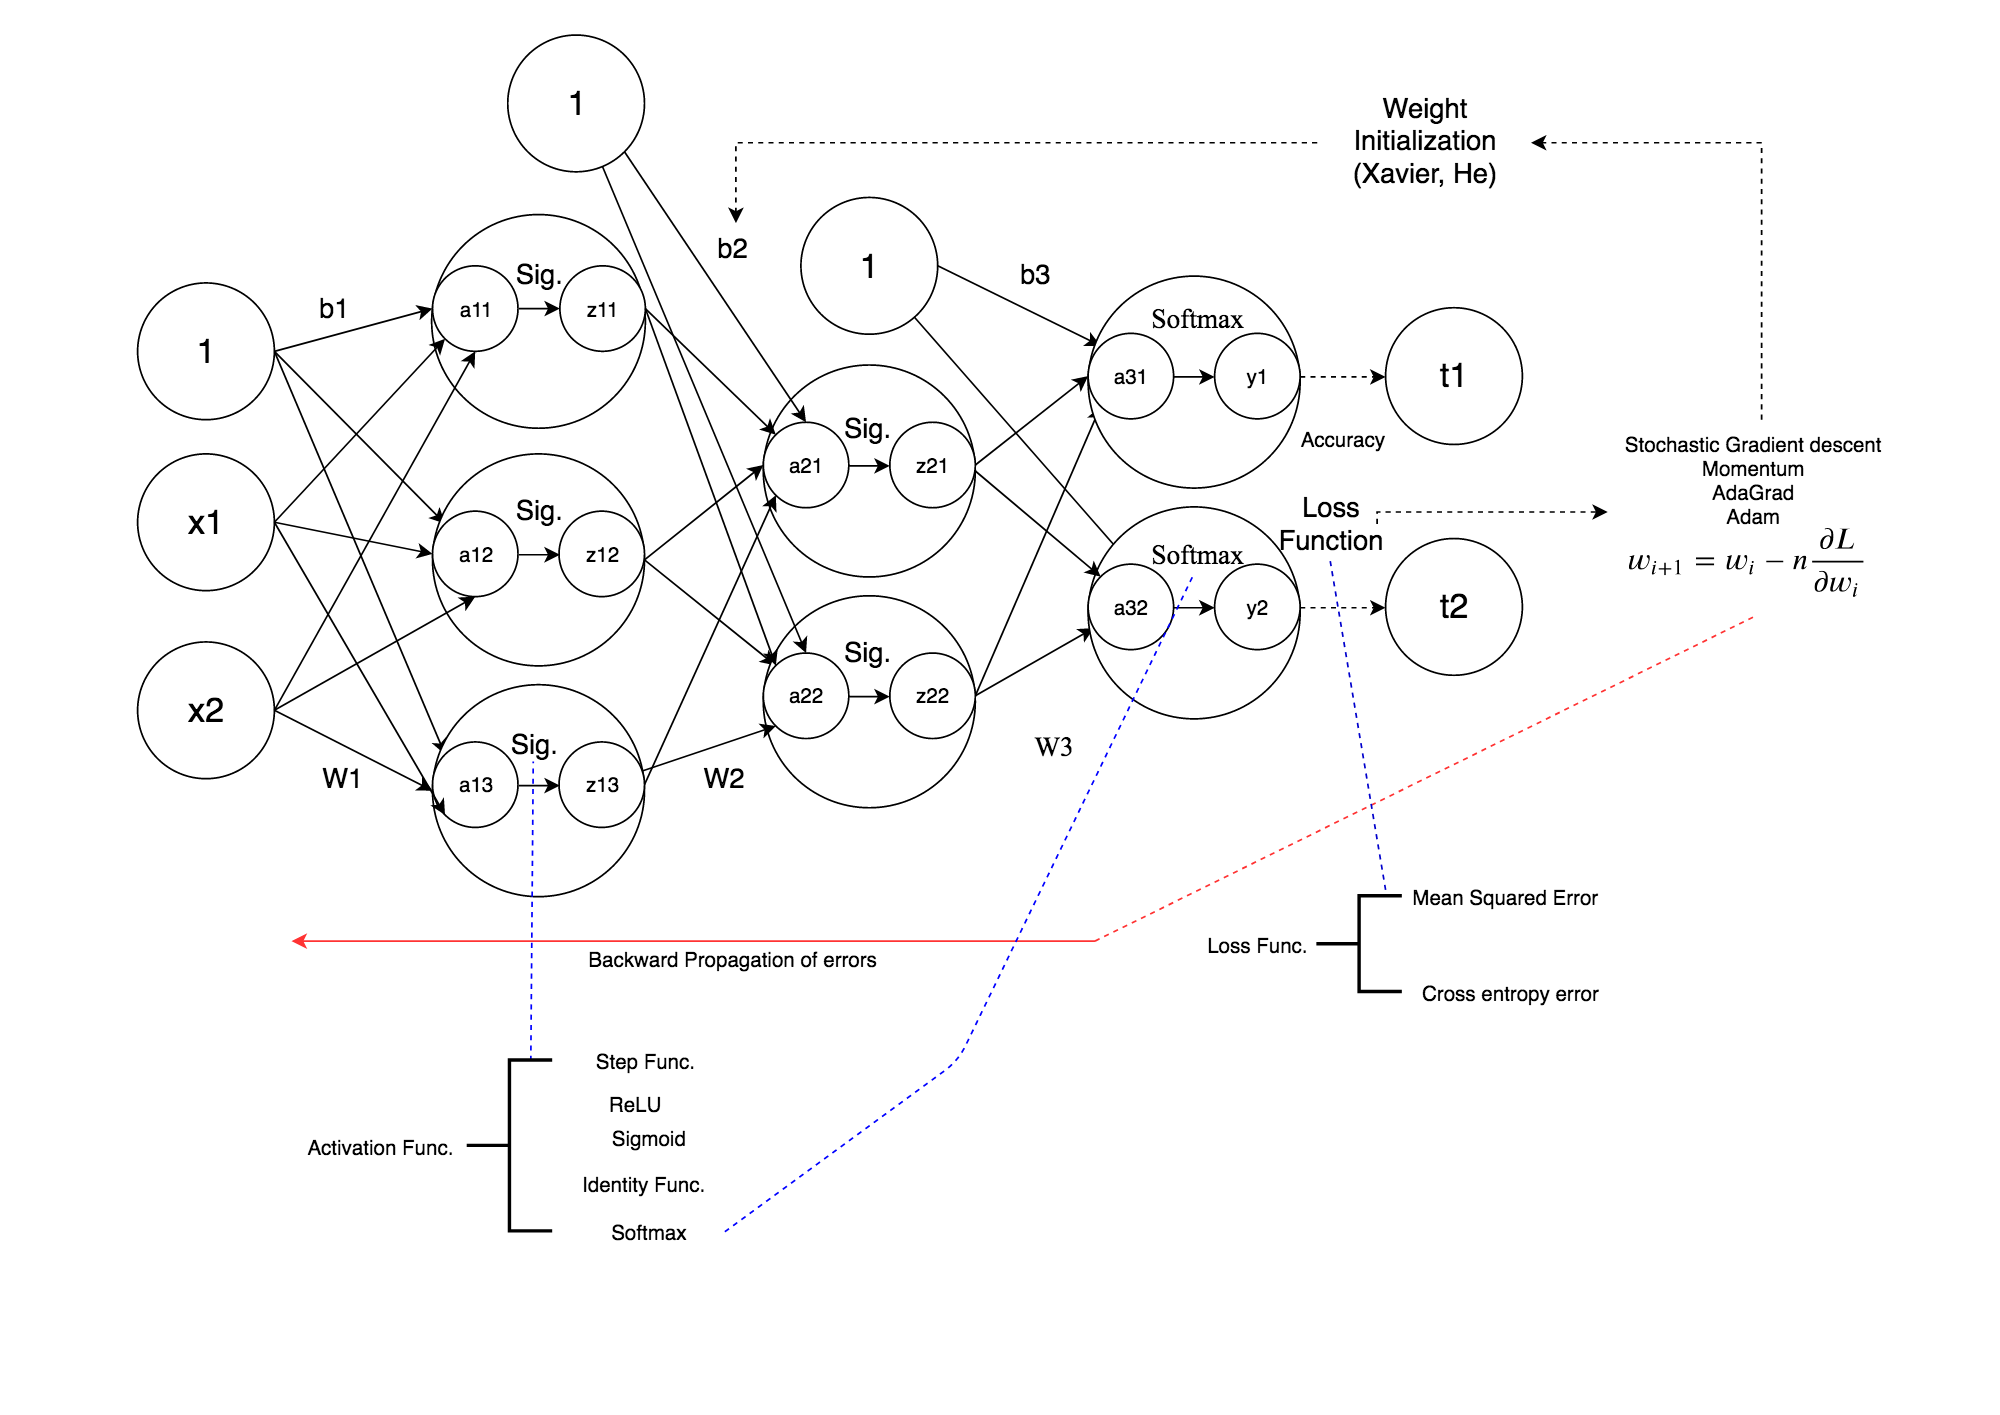

#다차원 배열의 곱

In [ ]:
X = np.array([1, 2]) # x1 = 1, x2 = 2

In [ ]:
W = np.array([[1, 3, 5], [2, 4, 6]])

In [ ]:
np.dot(X, W)

array([ 5, 11, 17])

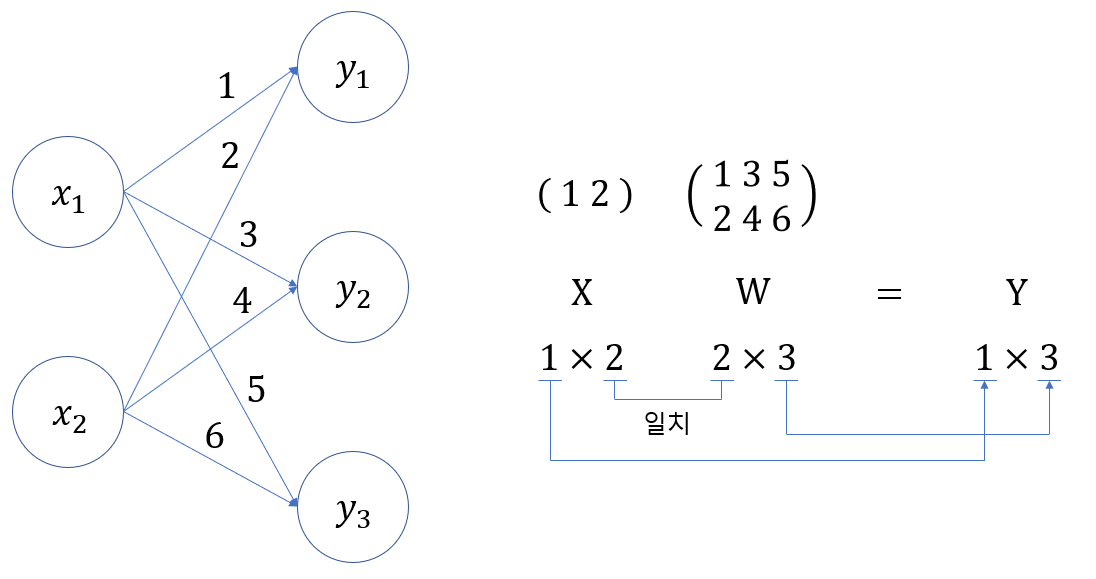

In [ ]:
X.shape

(2,)

In [ ]:
W.shape

(2, 3)

In [ ]:
np.dot(X, W)

array([ 5, 11, 17])

In [ ]:
np.dot(W, X)

ValueError: ignored

#활성화 함수

In [ ]:
def step_func(x):
    if x>0:
        return 1
    else:
        return 0

In [ ]:
step_func(0.1)

1

In [ ]:
step_func(-0.1)

0

In [ ]:
x = np.arange(-5, 5, 0.1)

In [ ]:
x

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [ ]:
step_func(x)

ValueError: ignored

In [ ]:
def step_func(x):
    y =x>0
    return y.astype(int)

In [ ]:
x>0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
y = x>0

In [ ]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
y.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
step_func(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

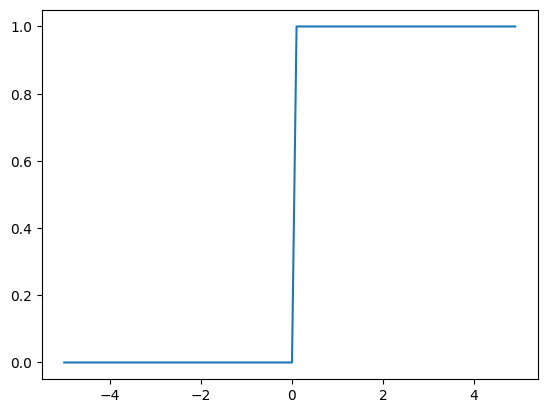

In [ ]:
plt.plot(x, step_func(x))

1. 딥러닝 기본 : ANN, CNN, RNN


2. Keras, LSTM(GRU), 전이학습(ResNet50) -> 주가예측, 상품추천시스템, 챗봇

3. 알파고, ChatGPT

DeepChem

Detectron -> 아동심리

OpenSim

시그모이드 식
$$
\begin{equation*}
h(x) = \frac{1}{1 + e^{-x}}
\end{equation*}
$$
exp(-x)는 e<sup>-x</sup>, e는 자연상수로 2.7182...

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])

In [ ]:
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [ ]:
x = np.arange(-5, 5, 0.1)

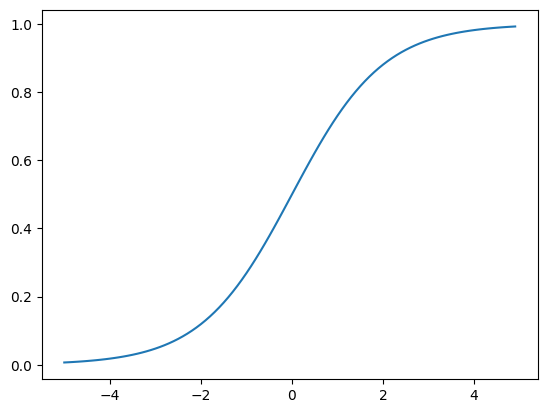

In [ ]:
plt.plot(x, sigmoid(x))

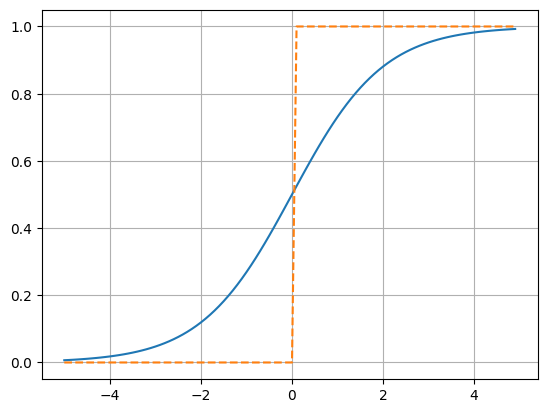

In [ ]:
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, step_func(x), label='step_function', linestyle='--')
plt.grid()

scipy.special.expit

In [ ]:
def relu(x):
    return np.maximum(0, x)

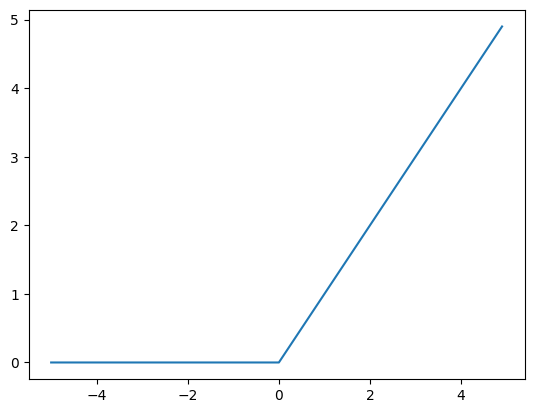

In [ ]:
plt.plot(x, relu(x))

In [ ]:
def identify_func(x):
    return x

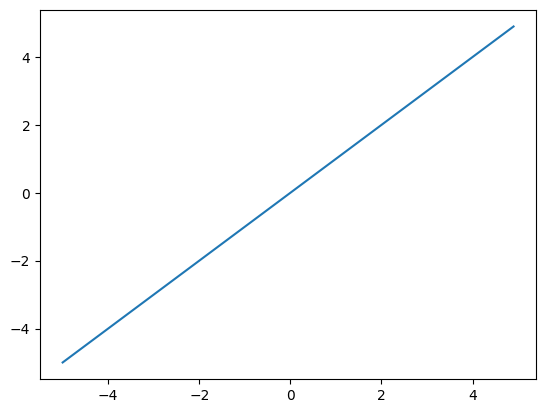

In [ ]:
plt.plot(x, identify_func(x))

소프트맥스 함수

\begin{equation*}
y_{k} = \frac{exp(a_{k})}{\sum_{i=1}^{n} exp(a_{i})}
\end{equation*}


In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [ ]:
a = np.array([0.3, 2.9, 4.0])

In [ ]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [ ]:
a = np.array([1010, 1000, 990])

In [ ]:
softmax(a)

<ipython-input-162-37433be62e67>:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-162-37433be62e67>:4: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


array([nan, nan, nan])

In [ ]:
a = np.array([2, 3, 4])

In [ ]:
softmax(a)

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:
a = a - np.max(a)

In [ ]:
a

array([-2, -1,  0])

In [ ]:
softmax(a)

array([0.09003057, 0.24472847, 0.66524096])

In [ ]:
a

array([-2, -1,  0])

In [ ]:
a = np.array([1010, 1000, 990])

In [ ]:
a = a - np.max(a)

In [ ]:
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])